### 05/02/2020
## Applied Predictive Modeling-Chapter 4
### GROUP 9
   _Anwunah Sobechukwu_ ,
   _Oyelami Quadri_ ,
   _Akeju Tony_

In [425]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Question 4.1

(11452, 192)


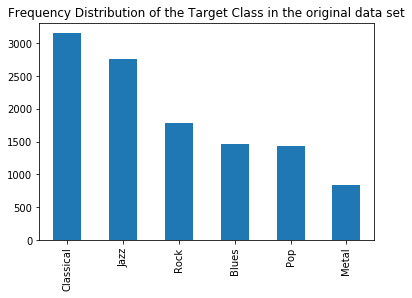

In [427]:
#Oil Type Predictors
mus_var = pd.read_csv('genresTrain.csv',low_memory=False)
print(mus_var.shape)
mus_var['GENRE'].value_counts().plot.bar(title='Frequency Distribution of the Target Class in the original data set')

### (a) What data splitting method(s) would you use for these data? Explain.

The Training set of the music genre dataset comprises of 11452 samples and 192 predictors, with the 192nd predictor being the target variable of 6 classes. The classes and their frequency are thus:
    
    Classical    3157
    Jazz         2760
    Rock         1792
    Blues        1462
    Pop          1438
    Metal         842

Because the sample size is large enough, a simple train test split can be done. Although, the classes may seem represented, it is a bit imbalance and to avoid missing out on any class during the split, a stratified random sample should be used. 
The train_test_split function of the scikit learn library can be used to split the data into desired fractions while passing in the target column to the **stratify** argument

To evaluate model performance, due to the large sample size, cross validation can be used to evaluate the performance using a KFold of 5 or 10

# Question 4.3

In [428]:
XcalManProcess = pd.read_csv('ChemicalManufacturingProcess.csv')
X = XcalManProcess.iloc[0:,1:]
y = XcalManProcess.iloc[0:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [408]:
Components = range(1,11)
Mean = (0.444,0.500,0.533,0.545,0.542,0.537,0.534,0.534,0.520,0.507)
Std_Error = (0.0272,0.0298,0.0302,0.0308,0.0322,0.0327,0.0333,0.0330,0.0326,0.0324)
Resampled = pd.DataFrame(
    {'Components': Components,
     'Mean': Mean,
     'Std_Error': Std_Error
    })
Resampled = Resampled.set_index('Components')
Resampled

,Mean,Std_Error
Components,,
1,0.444,0.0272
2,0.500,0.0298
3,0.533,0.0302
4,0.545,0.0308
5,0.542,0.0322
6,0.537,0.0327
7,0.534,0.0333
8,0.534,0.0330
9,0.520,0.0326


### (a) Using the “one-standard error”method, what number of PLS components provides the most parsimonious model?

In [409]:
Resampled['Lower Boundary'] = Resampled['Mean'] - Resampled['Std_Error']
Resampled['Upper Boundary'] = Resampled['Mean'] + Resampled['Std_Error']
Resampled

,Mean,Std_Error,Lower Boundary,Upper Boundary
Components,,,,
1,0.444,0.0272,0.4168,0.4712
2,0.500,0.0298,0.4702,0.5298
3,0.533,0.0302,0.5028,0.5632
4,0.545,0.0308,0.5142,0.5758
5,0.542,0.0322,0.5098,0.5742
6,0.537,0.0327,0.5043,0.5697
7,0.534,0.0333,0.5007,0.5673
8,0.534,0.0330,0.5010,0.5670
9,0.520,0.0326,0.4874,0.5526


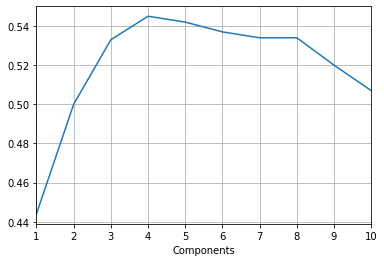

In [410]:
Resampled['Mean'].plot(grid=True)

From the plot of the Mean, we can see that the numerically optimal value of the component parameter is a mean of 0.545 at 4 components.

The most parsimonious model will be the component in which its mean falls within one standard error of the numerically optimal value component. That is the mean accuracy should be greater than the lower boundary but less than the mean of the numerically optimal value component.

The lower boundary of the component 4 is 0.5142 and the component with a mean accuracy that falls withi the falls within one standard error of the numerically optimal value component is component 3 with a mean of 0.533

### (b) Compute the tolerance values for this example. If a 10% loss in R2 is acceptable, then what is the optimal number of PLS components?

In [411]:
Resampled['Tolerance'] = (Resampled['Mean'] - 0.545) / 0.545
Resampled

,Mean,Std_Error,Lower Boundary,Upper Boundary,Tolerance
Components,,,,,
1,0.444,0.0272,0.4168,0.4712,-0.185321
2,0.500,0.0298,0.4702,0.5298,-0.082569
3,0.533,0.0302,0.5028,0.5632,-0.022018
4,0.545,0.0308,0.5142,0.5758,0.000000
5,0.542,0.0322,0.5098,0.5742,-0.005505
6,0.537,0.0327,0.5043,0.5697,-0.014679
7,0.534,0.0333,0.5007,0.5673,-0.020183
8,0.534,0.0330,0.5010,0.5670,-0.020183
9,0.520,0.0326,0.4874,0.5526,-0.045872


In [424]:
loss = round(0.545-(0.10*0.545),3)
loss

0.491

Another alternative to finding the parsimonious model is to select the model of mean within a certain tolerance of the numerically best value. In this case we have an acceptable loss of 10%, so any component with mean within this range is acceptable. Evaluating the loss as 0.491, any mean value that is between this and the numerically best value is acceptable. 

Also, see below in the plot that the model components that falls within 10% of the numerically best value is component 2 and 3. 

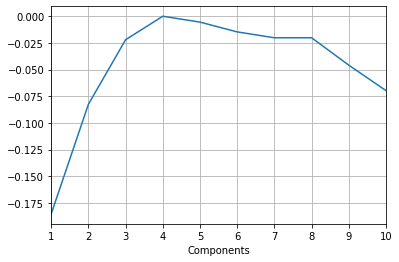

In [429]:
Resampled['Tolerance'].plot(grid=True)

### (c) Several other models (discussed in Part II) with varying degrees of complexity were trained and tuned and the results are presented in Fig. 4.13. If the goal is to select the model that optimizes R2, then which model(s) would you choose, and why?

The R square is highest for the random forest model followed by the SVM model, so for optimizing Rsquare these are the most prefered model.

### (d) Prediction time, as well as model complexity (Sect. 4.8) are other factors to consider when selecting the optimal model(s). Given each model’s prediction time, model complexity, and R2 estimates, which model(s) would you choose, and why?

Base on model’s prediction time, model complexity, and R squred  estimates the prefered model would be the SVM model considering that it is fairly fast and its R squre is close to the best R square.

# Question 4.4

(96, 7)
(96, 1)
(96, 8)


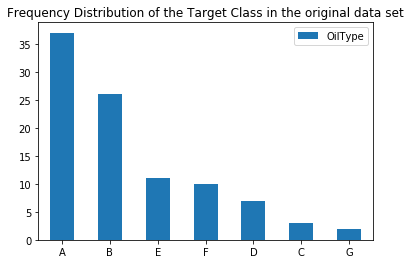

In [430]:
#Oil Type Predictors
var = pd.read_csv('Oil.csv')

#Oil Type Labels
tag = pd.read_csv('oilType.csv')
print(var.shape)
print(tag.shape)

#Join both dataframe 
df = pd.concat([var,tag],axis=1)
print(df.shape)
#Plotting the distribution of the Oil type labels using a horizontal bar plot
df['OilType'].value_counts().plot.bar(rot=0,legend=True,title='Frequency Distribution of the Target Class in the original data set')

### (a) Use the sample function in base R to create a completely random sample of 60 oils. How closely do the frequencies of the random sample match the original samples? 

#### Repeat this procedure several times of understand the variation in the sampling process.

###### The pandas library has a function **sample** that randomly shuffles the data set and returns a sample of the data based on the size passed in the argument.

The For loop below generates 6 different samples and uses a bar plot to display the target variable didtribution in each sample to be compared with the classes represented in the actual dataset.

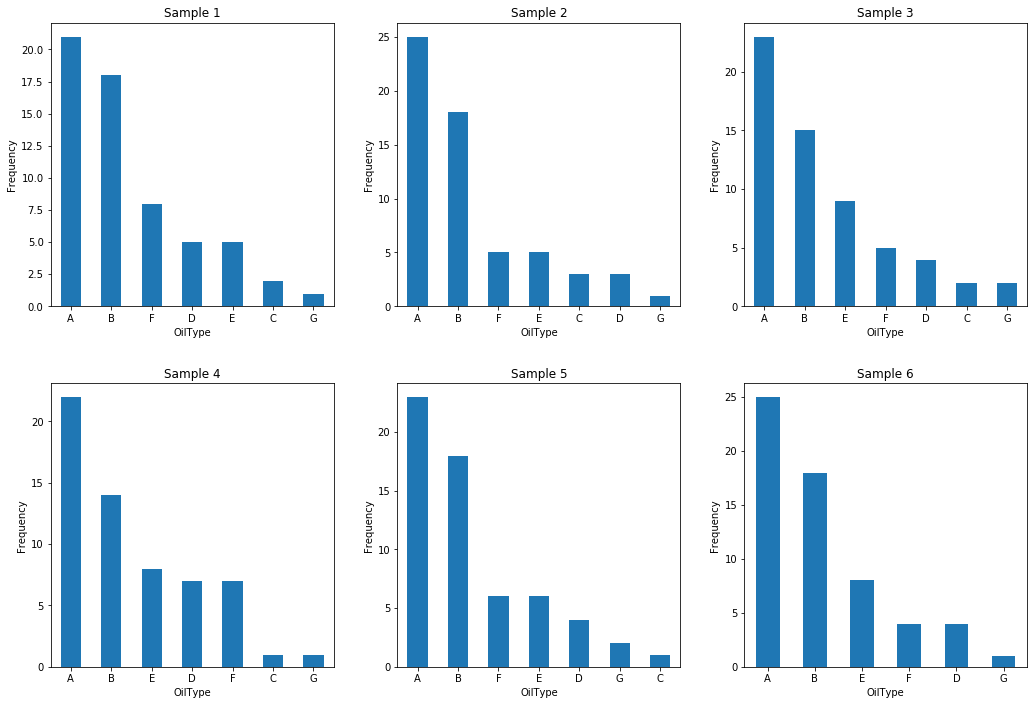

In [313]:
freqTab = {}
fig = plt.figure(figsize=(15,15))
for i in range(1,7):
    samp = df.sample(n=60,random_state=i+2)
    samp_freq = samp['OilType'].value_counts()
    freqTab['sample ' + str(i)] =samp_freq
    ax = fig.add_subplot(3, 3,i)
    samp['OilType'].value_counts().plot.bar(rot=0)
    ax.set_xlabel('OilType')
    ax.set_ylabel('Frequency')
    ax.set_title('Sample ' +str(i))

plt.tight_layout(pad=3.0)
plt.show()

Using the sample function, we can see that there is more variability with the classes with lower frequency as they may not be included in some partitions. Classes like **G** and **C** may not be captured in some samples and thus will be insuffiecient to be used to train a model.

In [314]:
freq_tab = pd.DataFrame(freqTab).reset_index().rename(columns={'index': 'OilType'})
freq_tab

,OilType,sample 1,sample 2,sample 3,sample 4,sample 5,sample 6
0,A,21,25,23,22,23,25.0
1,B,18,18,15,14,18,18.0
2,C,2,3,2,1,1,NaN
3,D,5,3,4,7,4,4.0
4,E,5,5,9,8,6,8.0
5,F,8,5,5,7,6,4.0
6,G,1,1,2,1,2,1.0


### (b) Use the caret package function createDataPartition to create a stratified random sample. How does this compare to the completely random samples?

The Scikit Learn library has a module **Train-test-split** that splits the data into the desired fractions when **test_size** or **frac** is pass. The **test_size** can either be in float(0.0 - 1.0) or integer(1-(n-1)), if it's a float then the split returns a fraction of the data that is equivalent to the test_size passed as the test size but if it is an integer it returns the exact number passed as the test data.

To create stratified random splits of the data based on a particular variable, the variable of interest is assigned to the parameter **stratify**. In this case we want the split to be based on the target variable.

Reference: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=split#sklearn.model_selection.train_test_split">train_test_split</a>

In [79]:
X_train, X_test, y_train, y_test = train_test_split(var, tag, test_size=0.33, random_state=42, stratify=tag)

In [311]:
y_train['OilType'].value_counts()

A    22
B    15
F     6
E     6
D     4
C     2
G     1
Name: OilType, dtype: int64

The stratified sampling generates random samples that are closer to the original sample in terms of the frequency distribution and putting into consideration the target variables, making sure that each class from the original data set is equally represented in the split and none is left out unlike the random sampling which does not consider this and in some cases will present a sample case with less than or an absense of a particular class especially when a class is underrepresented. 

### (c) With such a small samples size, what are the options for determining performance of the model? Should a test set be used?

Setting aside a test set for determining model performance not only reduces the learning capacity of the model as regards to the reduced number of training data but the performance metrics will be biased as the test data wouldn't be enough to give an optimal performance metric of the model. Preferably, **Leave-one-out-Cross-Validation** will be used as computational cost wouldn't be much of a problem considering the number of samples. **N-number** of sample data will be left out for testing while the remaining is being used to train the model.

### (d) Try different samples sizes and accuracy rates to understand the trade-off between the uncertainty in the results, the model performance, and the test set size.

In [297]:
#calculate the 95% confidence interval
def binom_confidence_interval(accuracy,n,ci):
    """
    accuracy - accuracy of classifier model on test/validation set
    n - Number of sample used for test/validation
    ci - Percentage of Confidence Interval (90,95,98,99)
    """
    from math import sqrt
    if ci == 90:
        z=1.64 
    if ci == 95:
        z=1.96
    if ci == 98:
        z=2.33
    if ci == 99:
        z=2.58
    
    interval = z * sqrt( (accuracy * (1 - accuracy)) / n)
    lower_ci = accuracy - interval
    upper_ci = accuracy + interval
    width_ci = upper_ci-lower_ci

    return lower_ci.round(3),upper_ci.round(3)

#binom_confidence_interval(acc,len(y_test),95)

The SVM library of sklearn takes in quite a number of arguments amongst which these 3 are paramount:

   1. **C** - The regularization parameter with the objective to balance the margin maximization and loss. Regularization is a technique of penalizing high-variance models in the optimization process to get less overfitted one. The penalty is a squared l2 penalty. This is incorporated in the **Cost Function**; average of the loss functions of the entire training set In the SVM algorithm (The loss function known as the hinge loss helps maximize the margin between the data points and the hyperplane.)
   2. **kernel** - Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. 

For more information, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">Read here</a>
<a href=" https://scikit-learn.org/stable/modules/svm.html#svm-kernels">and here</a>
 
          

In [328]:
result = {}
for size in range(20,75,5):
    ##Split Data into training and test set
    X_train, X_test, y_train, y_test = train_test_split(var, tag, test_size=size, random_state=size+2, stratify=tag)
    ##Build the model
    clf = SVC(kernel='linear')
    clf.fit(X_train,y_train.values.ravel())

    #Predict the test set
    y_pred = clf.predict(X_test)

    #Check accuracy
    acc = accuracy_score(y_test,y_pred).round(2)

    #Number of Correctly Identified Class
    cor_class = acc*len(y_test)
    
    lower_ci, upper_ci = binom_confidence_interval(accuracy=acc,n=size,ci=95)
    width = upper_ci - lower_ci
    
    result['Test Size ' + str(size)] = [acc,lower_ci, upper_ci, width]

res = pd.DataFrame(result,index=['Accuracy','Lower Confidence Interval','Upper Confidence Interval', 'Width'] )
res

,Test Size 20,Test Size 25,Test Size 30,Test Size 35,Test Size 40,Test Size 45,Test Size 50,Test Size 55,Test Size 60,Test Size 65,Test Size 70
Accuracy,1.0,0.920,0.900,0.940,0.920,0.910,0.960,0.910,0.970,0.970,0.93
Lower Confidence Interval,1.0,0.814,0.793,0.861,0.836,0.826,0.906,0.834,0.927,0.929,0.87
Upper Confidence Interval,1.0,1.026,1.007,1.019,1.004,0.994,1.014,0.986,1.013,1.011,0.99
Width,0.0,0.212,0.214,0.158,0.168,0.168,0.108,0.152,0.086,0.082,0.12


   1. The decrease in train data reduces the peformance of the model as it is more profitable to use large set of data to train the model. 
   2. The test set is so small to validate the performance of the model so it is very likely it will have higher accuracy in smaller set than with a larger test set. The model may not really perform well if a large data is tested given the same amount of training data.
   3. With same accuracy, increase in test size reduces the width of the interval; they are indirectly proportional to the other. 
   
These observations are subjective and are likely to differ in some other predictive models. So it is advisable that each modeling case be subjected to same evaluation to be able to determine the best or most prefered tuning parameters.